In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
ls


answer_   answer_1.csv  AV_ML.ipynb            test.csv
answer_1  answer_2.csv  sample_submission.csv  train.csv


In [161]:
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submit=pd.read_csv("sample_submission.csv")

In [162]:
data.shape

(73147, 16)

In [163]:
test.shape

(31349, 15)

In [164]:
data.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [165]:
data.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

In [166]:
data.head(8)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1
5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,High School Diploma,1,29.0,4,N,2.0,0
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1
7,8129_61,U_1,U,134,61,online,easy,8129,M,Matriculation,2,45.0,1,N,1.0,1


In [167]:
data.is_pass.value_counts()
#data is more biased to "1"

1    50867
0    22280
Name: is_pass, dtype: int64

In [168]:
data.program_type.value_counts()

Y    22560
T    18458
V    13025
U     7821
Z     6629
X     3328
S     1326
Name: program_type, dtype: int64

In [169]:
# data = data.drop(['id'],axis=1)

In [170]:
data.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [171]:
data.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [172]:
test.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


In [173]:
test["is_pass"] = 1

In [174]:
test.shape

(31349, 16)

In [175]:
data["label"]=1
test["label"]=0

In [176]:
new_data = pd.concat([data, test])

In [177]:
new_data

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0,1
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1,1
5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,High School Diploma,1,29.0,4,N,2.0,0,1
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1,1
7,8129_61,U_1,U,134,61,online,easy,8129,M,Matriculation,2,45.0,1,N,1.0,1,1
8,5652_57,U_1,U,134,57,offline,easy,5652,M,Matriculation,4,NaN,3,N,3.0,1,1
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1,1


In [178]:
new_data.shape

(104496, 17)

In [179]:
data.shape[0] + test.shape[0]

104496

In [180]:
new_data.reset_index(inplace=True)

In [181]:
new_data

,index,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label
0,0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0,1
1,1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1,1
2,2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1,1
3,3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1,1
4,4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1,1
5,5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,High School Diploma,1,29.0,4,N,2.0,0,1
6,6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1,1
7,7,8129_61,U_1,U,134,61,online,easy,8129,M,Matriculation,2,45.0,1,N,1.0,1,1
8,8,5652_57,U_1,U,134,57,offline,easy,5652,M,Matriculation,4,NaN,3,N,3.0,1,1
9,9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1,1


In [182]:
new_data.shape

(104496, 18)

In [183]:
new_data.program_type.value_counts()

Y    32304
T    26361
V    18594
U    11213
Z     9337
X     4728
S     1959
Name: program_type, dtype: int64

In [184]:
new_data.drop(['id','test_id','trainee_id'],axis=1,inplace=True)

In [185]:
new_data.drop(['index'],axis=1,inplace=True)

In [186]:
new_data.shape

(104496, 14)

In [187]:
new_data.head()

,program_id,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label
0,Y_1,Y,136,offline,intermediate,M,Matriculation,3,24.0,5,N,1.0,0,1
1,T_1,T,131,offline,easy,F,High School Diploma,4,26.0,2,N,3.0,1,1
2,Z_2,Z,120,online,easy,M,Matriculation,1,40.0,1,N,2.0,1,1
3,T_2,T,117,offline,easy,F,Matriculation,3,NaN,4,N,1.0,1,1
4,V_3,V,131,offline,intermediate,F,High School Diploma,1,42.0,2,N,4.0,1,1


In [188]:
new_data.program_id.value_counts()

Y_3    9589
Y_1    9521
T_3    8919
Y_4    7138
T_4    6841
U_1    6792
V_4    6159
T_2    6080
Y_2    6056
V_3    4859
V_1    4856
T_1    4521
U_2    4421
Z_3    3652
Z_2    3016
V_2    2720
Z_1    2669
X_1    1911
X_3    1698
X_2    1119
S_2    1013
S_1     946
Name: program_id, dtype: int64

In [189]:
new_data.program_type.value_counts()

Y    32304
T    26361
V    18594
U    11213
Z     9337
X     4728
S     1959
Name: program_type, dtype: int64

# COPY


In [190]:
train = new_data

In [118]:
###feature engineering on train data

In [119]:
train.head()

,program_id,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label
0,Y_1,Y,136,offline,intermediate,M,Matriculation,3,24.0,5,N,1.0,0,1
1,T_1,T,131,offline,easy,F,High School Diploma,4,26.0,2,N,3.0,1,1
2,Z_2,Z,120,online,easy,M,Matriculation,1,40.0,1,N,2.0,1,1
3,T_2,T,117,offline,easy,F,Matriculation,3,NaN,4,N,1.0,1,1
4,V_3,V,131,offline,intermediate,F,High School Diploma,1,42.0,2,N,4.0,1,1


In [120]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [121]:
new_data.program_id = le.fit_transform(new_data.program_id)

In [122]:
new_data.head(2)

,program_id,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label
0,15,Y,136,offline,intermediate,M,Matriculation,3,24.0,5,N,1.0,0,1
1,2,T,131,offline,easy,F,High School Diploma,4,26.0,2,N,3.0,1,1


In [123]:
new_data.program_type = le.fit_transform(new_data.program_type)

In [124]:
new_data.program_duration.describe()

count    104496.000000
mean        128.209386
std           6.892792
min         117.000000
25%         121.000000
50%         131.000000
75%         134.000000
max         136.000000
Name: program_duration, dtype: float64

In [125]:
new_data.isnull().sum()

program_id                       0
program_type                     0
program_duration                 0
test_type                        0
difficulty_level                 0
gender                           0
education                        0
city_tier                        0
age                          39520
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating      108
is_pass                          0
label                            0
dtype: int64

In [126]:
new_data.head(3)

,program_id,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label
0,15,5,136,offline,intermediate,M,Matriculation,3,24.0,5,N,1.0,0,1
1,2,1,131,offline,easy,F,High School Diploma,4,26.0,2,N,3.0,1,1
2,20,6,120,online,easy,M,Matriculation,1,40.0,1,N,2.0,1,1


In [127]:
new_data.test_type = le.fit_transform(new_data.test_type)
new_data.difficulty_level = le.fit_transform(new_data.difficulty_level)
new_data.education = le.fit_transform(new_data.education)
new_data.is_handicapped = le.fit_transform(new_data.is_handicapped)

In [128]:
new_data.gender = le.fit_transform(new_data.gender)

In [129]:
new_data.is_handicapped.value_counts()

0    95247
1     9249
Name: is_handicapped, dtype: int64

In [130]:
new_data

,program_id,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label
0,15,5,136,0,2,1,3,3,24.0,5,0,1.0,0,1
1,2,1,131,0,0,0,1,4,26.0,2,0,3.0,1,1
2,20,6,120,1,0,1,3,1,40.0,1,0,2.0,1,1
3,3,1,117,0,0,0,3,3,NaN,4,0,1.0,1,1
4,10,3,131,0,2,0,1,1,42.0,2,0,4.0,1,1
5,4,1,134,0,2,0,1,1,29.0,4,0,2.0,0,1
6,16,5,120,1,0,1,0,2,48.0,3,0,3.0,1,1
7,6,2,134,1,0,1,3,2,45.0,1,0,1.0,1,1
8,6,2,134,0,0,1,3,4,NaN,3,0,3.0,1,1
9,15,5,136,0,1,1,0,3,28.0,2,0,4.0,1,1


In [131]:
new_data.dtypes

program_id                     int64
program_type                   int64
program_duration               int64
test_type                      int64
difficulty_level               int64
gender                         int64
education                      int64
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                 int64
trainee_engagement_rating    float64
is_pass                        int64
label                          int64
dtype: object

In [132]:
new_data.age.describe()

count    64976.000000
mean        36.478038
std          9.045325
min         17.000000
25%         28.000000
50%         39.000000
75%         45.000000
max         63.000000
Name: age, dtype: float64

In [133]:
new_data.age.isnull().sum()

39520

In [134]:
new_data.age.fillna(42,inplace=True)

In [135]:
new_data.isnull().sum()

program_id                     0
program_type                   0
program_duration               0
test_type                      0
difficulty_level               0
gender                         0
education                      0
city_tier                      0
age                            0
total_programs_enrolled        0
is_handicapped                 0
trainee_engagement_rating    108
is_pass                        0
label                          0
dtype: int64

In [136]:
new_data.trainee_engagement_rating.fillna(3,inplace=True)

In [137]:
new_data.head()

,program_id,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label
0,15,5,136,0,2,1,3,3,24.0,5,0,1.0,0,1
1,2,1,131,0,0,0,1,4,26.0,2,0,3.0,1,1
2,20,6,120,1,0,1,3,1,40.0,1,0,2.0,1,1
3,3,1,117,0,0,0,3,3,42.0,4,0,1.0,1,1
4,10,3,131,0,2,0,1,1,42.0,2,0,4.0,1,1


In [138]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# # new_data=sc.fit_transform(new_data)

In [139]:
new_data.head()

,program_id,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label
0,15,5,136,0,2,1,3,3,24.0,5,0,1.0,0,1
1,2,1,131,0,0,0,1,4,26.0,2,0,3.0,1,1
2,20,6,120,1,0,1,3,1,40.0,1,0,2.0,1,1
3,3,1,117,0,0,0,3,3,42.0,4,0,1.0,1,1
4,10,3,131,0,2,0,1,1,42.0,2,0,4.0,1,1


In [140]:
data1 = new_data[new_data.label==1]

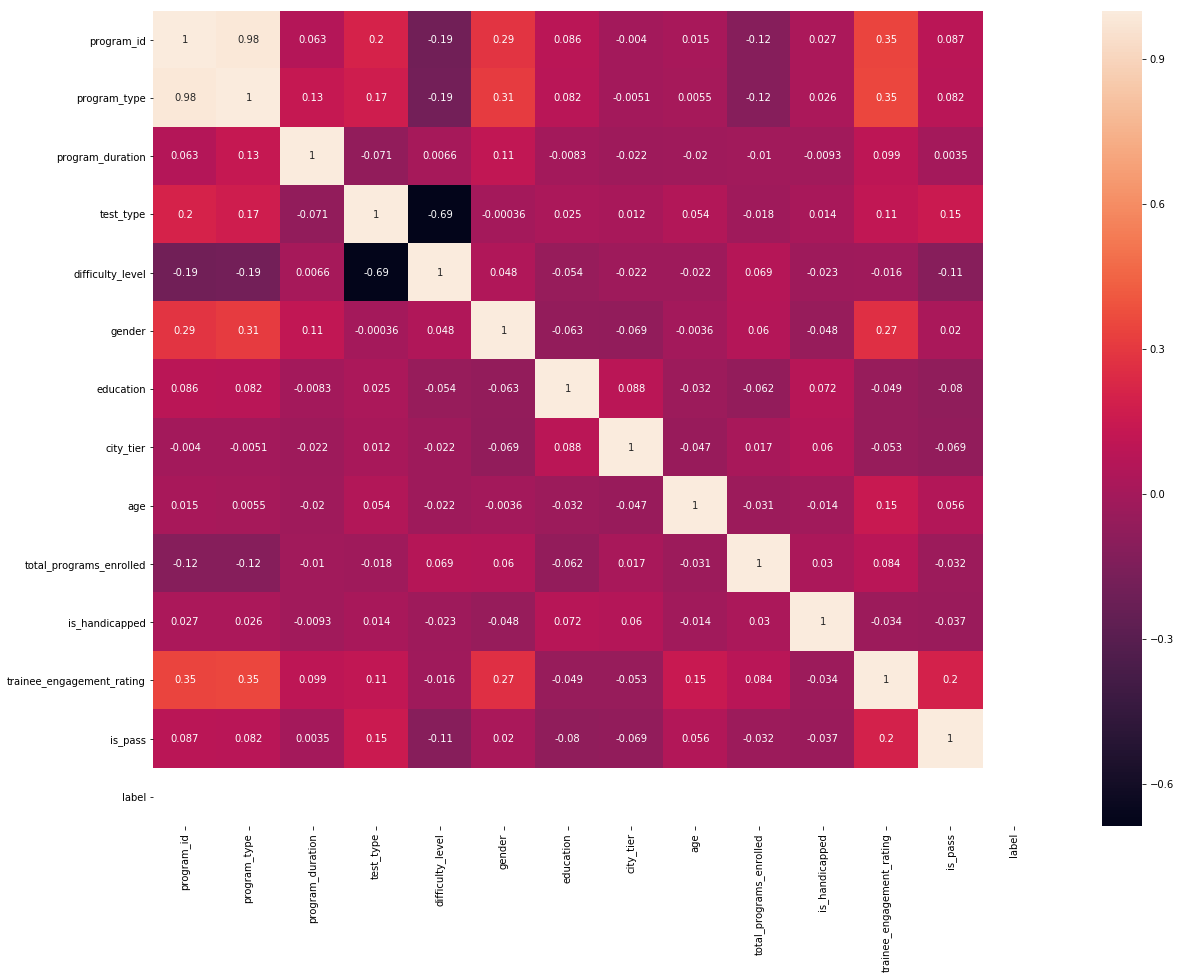

In [141]:
plt.figure(figsize=(20,15))
sns.heatmap(data1.corr(),annot=True)

In [142]:
import scipy

In [143]:

scipy.stats.pearsonr(data1.test_type,data1.is_pass)

(0.15154653090119777, 0.0)

In [189]:

test1 = new_data[new_data.label == 0]

In [190]:
print(data.shape)
print(data1.shape)

(73147, 17)
(73147, 14)


In [191]:
print(test.shape)
print(test1.shape)

(31349, 17)
(31349, 14)


In [192]:
data1.head()

,program_id,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label
0,15,5,136,0,2,1,3,3,24.0,5,0,1.0,0,1
1,2,1,131,0,0,0,1,4,26.0,2,0,3.0,1,1
2,20,6,120,1,0,1,3,1,40.0,1,0,2.0,1,1
3,3,1,117,0,0,0,3,3,42.0,4,0,1.0,1,1
4,10,3,131,0,2,0,1,1,42.0,2,0,4.0,1,1


In [193]:
p=data1.pop('label')

In [194]:
test1.head()

,program_id,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label
73147,2,1,131,0,2,0,3,3,46.0,2,0,4.0,1,0
73148,17,5,135,1,0,1,0,3,42.0,4,0,4.0,1,0
73149,16,5,120,1,0,1,3,3,42.0,2,0,3.0,1,0
73150,11,3,122,0,3,0,1,1,42.0,2,0,2.0,1,0
73151,11,3,122,0,2,0,3,3,42.0,2,0,2.0,1,0


In [195]:
test1.drop(['is_pass','label'],axis=1,inplace=True)

In [196]:
data1.shape

(73147, 13)

In [197]:
test1.reset_index(inplace=True)

In [198]:
test1.shape

(31349, 13)

In [199]:
t=test1.pop('index')

In [200]:
test1.head()

,program_id,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,2,1,131,0,2,0,3,3,46.0,2,0,4.0
1,17,5,135,1,0,1,0,3,42.0,4,0,4.0
2,16,5,120,1,0,1,3,3,42.0,2,0,3.0
3,11,3,122,0,3,0,1,1,42.0,2,0,2.0
4,11,3,122,0,2,0,3,3,42.0,2,0,2.0


In [201]:
data1.head(3)

,program_id,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,15,5,136,0,2,1,3,3,24.0,5,0,1.0,0
1,2,1,131,0,0,0,1,4,26.0,2,0,3.0,1
2,20,6,120,1,0,1,3,1,40.0,1,0,2.0,1


In [202]:
x = data1.iloc[:,:-1]

In [203]:
y=data1.iloc[:,-1:]

In [226]:
# x = sc.fit_transform(x)

In [215]:
# x

array([[ 0.69613932,  0.95297753,  1.1308767 , ...,  1.94717184,
        -0.31413807, -1.05400659],
       [-1.47258601, -1.24818284,  0.40514854, ..., -0.47060766,
        -0.31413807,  0.45573894],
       [ 1.53026445,  1.50326762, -1.19145343, ..., -1.27653416,
        -0.31413807, -0.29913383],
       ...,
       [ 0.86296435,  0.95297753, -1.19145343, ...,  0.33531884,
        -0.31413807,  1.21061171],
       [-0.13798581, -0.14760266,  0.40514854, ..., -0.47060766,
        -0.31413807, -0.29913383],
       [ 1.1966144 ,  0.95297753, -1.0463078 , ..., -0.47060766,
        -0.31413807,  1.21061171]])

In [207]:
np.unique(y)

array([0, 1])

In [208]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [209]:
x_train.shape

(51202, 12)

In [102]:
y_train.shape

(51202, 1)

In [210]:
# from sklearn.linear_model import LogisticRegression
# lr=  LogisticRegression()
# lr.fit(x_train,y_train)

In [211]:
import warnings
warnings.filterwarnings("ignore")

In [212]:
from sklearn.metrics import roc_auc_score

LR: 0.666410 (0.004558)
LDA: 0.666207 (0.004614)
KNN: 0.685078 (0.004186)
CART: 0.687323 (0.006752)
NB: 0.649700 (0.005202)


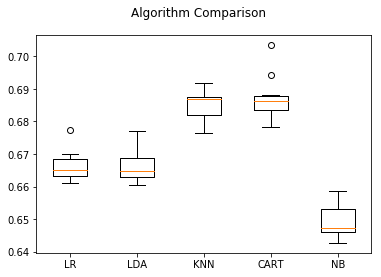

In [213]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
# scoring = 'accuracy'
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [216]:
lr =  LogisticRegression()
lr.fit(x_train,y_train)
res = lr.predict(x_test)
roc_auc_score(res, y_test)

0.6389313508012369

In [217]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
res = knn.predict(x_test)
roc_auc_score(res, y_test)

0.6270211976591645

In [218]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
res = xgb.predict(x_test)
roc_auc_score(res, y_test)

0.6669483639339502

In [219]:
test1=sc.fit_transform(test1)

In [220]:
sub=xgb.predict(test1)

In [221]:
values, counts = np.unique(res, return_counts=True)

In [222]:
values

array([0, 1])

In [223]:
counts

array([ 2765, 19180])

In [224]:
# submit= pd.read_csv("sample_submission.csv")

In [225]:
submit.head()

,id,is_pass
0,1626_45,0
1,11020_130,0
2,12652_146,0
3,7038_72,0
4,888_71,0


In [116]:
submit.drop(['id','is_pass'],axis=1,inplace=True)

In [117]:
submit.head()

""
0
1
2
3
4


In [118]:
submit["id"]=test.id

In [119]:
submit["is_pass"] = sub

In [123]:
submit.shape

(31349, 2)

In [128]:
submit.to_csv("answer_1.csv", index=False)

In [129]:
ls

answer_   answer_1.csv  sample_submission.csv  train.csv
answer_1  AV_ML.ipynb   test.csv


# Feature engineering 

In [191]:
train.head()

,program_id,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label
0,Y_1,Y,136,offline,intermediate,M,Matriculation,3,24.0,5,N,1.0,0,1
1,T_1,T,131,offline,easy,F,High School Diploma,4,26.0,2,N,3.0,1,1
2,Z_2,Z,120,online,easy,M,Matriculation,1,40.0,1,N,2.0,1,1
3,T_2,T,117,offline,easy,F,Matriculation,3,NaN,4,N,1.0,1,1
4,V_3,V,131,offline,intermediate,F,High School Diploma,1,42.0,2,N,4.0,1,1


In [192]:
train.dtypes

program_id                    object
program_type                  object
program_duration               int64
test_type                     object
difficulty_level              object
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
label                          int64
dtype: object

In [193]:
train.program_id.value_counts()

Y_3    9589
Y_1    9521
T_3    8919
Y_4    7138
T_4    6841
U_1    6792
V_4    6159
T_2    6080
Y_2    6056
V_3    4859
V_1    4856
T_1    4521
U_2    4421
Z_3    3652
Z_2    3016
V_2    2720
Z_1    2669
X_1    1911
X_3    1698
X_2    1119
S_2    1013
S_1     946
Name: program_id, dtype: int64

In [194]:
train.program_type.value_counts()

Y    32304
T    26361
V    18594
U    11213
Z     9337
X     4728
S     1959
Name: program_type, dtype: int64

In [195]:
dummy = pd.get_dummies(train.program_type)

In [196]:
# dummy

In [197]:
train=pd.concat([train, dummy],axis=1)

In [198]:
# train

In [199]:
train.drop(['program_type','Z'],axis=1,inplace=True)

In [200]:
train.drop(['program_id'],axis=1,inplace=True)

In [201]:
train.head()

,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label,S,T,U,V,X,Y
0,136,offline,intermediate,M,Matriculation,3,24.0,5,N,1.0,0,1,0,0,0,0,0,1
1,131,offline,easy,F,High School Diploma,4,26.0,2,N,3.0,1,1,0,1,0,0,0,0
2,120,online,easy,M,Matriculation,1,40.0,1,N,2.0,1,1,0,0,0,0,0,0
3,117,offline,easy,F,Matriculation,3,NaN,4,N,1.0,1,1,0,1,0,0,0,0
4,131,offline,intermediate,F,High School Diploma,1,42.0,2,N,4.0,1,1,0,0,0,1,0,0


In [202]:
train.dtypes

program_duration               int64
test_type                     object
difficulty_level              object
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
label                          int64
S                              uint8
T                              uint8
U                              uint8
V                              uint8
X                              uint8
Y                              uint8
dtype: object

In [203]:
train.test_type.value_counts()

offline    62256
online     42240
Name: test_type, dtype: int64

In [204]:
dummy=pd.get_dummies(train.test_type)

In [205]:
train = pd.concat([train, dummy],axis=1)

In [206]:
train.drop(['test_type','online'],axis=1,inplace=True)

In [207]:
train.head(3)

,program_duration,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label,S,T,U,V,X,Y,offline
0,136,intermediate,M,Matriculation,3,24.0,5,N,1.0,0,1,0,0,0,0,0,1,1
1,131,easy,F,High School Diploma,4,26.0,2,N,3.0,1,1,0,1,0,0,0,0,1
2,120,easy,M,Matriculation,1,40.0,1,N,2.0,1,1,0,0,0,0,0,0,0


In [208]:
train.difficulty_level.value_counts()

easy            57211
intermediate    29537
hard            14777
vary hard        2971
Name: difficulty_level, dtype: int64

In [209]:
dummy = pd.get_dummies(train.difficulty_level)
train = pd.concat([train, dummy],axis=1)

In [210]:
train.drop(['difficulty_level','vary hard'],axis=1,inplace=True)

In [211]:
dummy = pd.get_dummies(train.gender)
train = pd.concat([train, dummy],axis=1)
train.drop(['gender','F'],axis=1,inplace=True)

In [212]:
train.head(3)

,program_duration,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label,S,T,U,V,X,Y,offline,easy,hard,intermediate,M
0,136,Matriculation,3,24.0,5,N,1.0,0,1,0,0,0,0,0,1,1,0,0,1,1
1,131,High School Diploma,4,26.0,2,N,3.0,1,1,0,1,0,0,0,0,1,1,0,0,0
2,120,Matriculation,1,40.0,1,N,2.0,1,1,0,0,0,0,0,0,0,1,0,0,1


In [213]:
train.education.value_counts()

High School Diploma    48983
Matriculation          37432
Bachelors              16590
Masters                  754
No Qualification         737
Name: education, dtype: int64

In [214]:
dummy = pd.get_dummies(train.education)
train = pd.concat([train, dummy],axis=1)
train.drop(['education','No Qualification'],axis=1,inplace=True)

In [215]:
train.head(2)

,program_duration,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label,S,T,...,Y,offline,easy,hard,intermediate,M,Bachelors,High School Diploma,Masters,Matriculation
0,136,3,24.0,5,N,1.0,0,1,0,0,...,1,1,0,0,1,1,0,0,0,1
1,131,4,26.0,2,N,3.0,1,1,0,1,...,0,1,1,0,0,0,0,1,0,0


In [216]:
train.is_handicapped.value_counts()

N    95247
Y     9249
Name: is_handicapped, dtype: int64

In [217]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [218]:
train.is_handicapped=le.fit_transform(train.is_handicapped)

In [219]:
train.dtypes

program_duration               int64
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                 int64
trainee_engagement_rating    float64
is_pass                        int64
label                          int64
S                              uint8
T                              uint8
U                              uint8
V                              uint8
X                              uint8
Y                              uint8
offline                        uint8
easy                           uint8
hard                           uint8
intermediate                   uint8
M                              uint8
Bachelors                      uint8
High School Diploma            uint8
Masters                        uint8
Matriculation                  uint8
dtype: object

In [220]:
train.isnull().sum()

program_duration                 0
city_tier                        0
age                          39520
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating      108
is_pass                          0
label                            0
S                                0
T                                0
U                                0
V                                0
X                                0
Y                                0
offline                          0
easy                             0
hard                             0
intermediate                     0
M                                0
Bachelors                        0
High School Diploma              0
Masters                          0
Matriculation                    0
dtype: int64

In [221]:
train.age.describe()

count    64976.000000
mean        36.478038
std          9.045325
min         17.000000
25%         28.000000
50%         39.000000
75%         45.000000
max         63.000000
Name: age, dtype: float64

In [222]:
train.age.fillna(42, inplace=True)

In [223]:
train.trainee_engagement_rating.describe()

count    104388.000000
mean          2.397776
std           1.327130
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max           5.000000
Name: trainee_engagement_rating, dtype: float64

In [224]:
train.trainee_engagement_rating.fillna(3,inplace=True)

In [225]:
train.head(3)

,program_duration,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label,S,T,...,Y,offline,easy,hard,intermediate,M,Bachelors,High School Diploma,Masters,Matriculation
0,136,3,24.0,5,0,1.0,0,1,0,0,...,1,1,0,0,1,1,0,0,0,1
1,131,4,26.0,2,0,3.0,1,1,0,1,...,0,1,1,0,0,0,0,1,0,0
2,120,1,40.0,1,0,2.0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [226]:
train.program_duration = np.log(train.program_duration)
train.age = np.log(train.age)

In [227]:
train.head(3)

,program_duration,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label,S,T,...,Y,offline,easy,hard,intermediate,M,Bachelors,High School Diploma,Masters,Matriculation
0,4.912655,3,3.178054,5,0,1.0,0,1,0,0,...,1,1,0,0,1,1,0,0,0,1
1,4.875197,4,3.258097,2,0,3.0,1,1,0,1,...,0,1,1,0,0,0,0,1,0,0
2,4.787492,1,3.688879,1,0,2.0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [228]:
train.shape

(104496, 23)

In [229]:
train.head()

,program_duration,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label,S,T,...,Y,offline,easy,hard,intermediate,M,Bachelors,High School Diploma,Masters,Matriculation
0,4.912655,3,3.178054,5,0,1.0,0,1,0,0,...,1,1,0,0,1,1,0,0,0,1
1,4.875197,4,3.258097,2,0,3.0,1,1,0,1,...,0,1,1,0,0,0,0,1,0,0
2,4.787492,1,3.688879,1,0,2.0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,4.762174,3,3.737670,4,0,1.0,1,1,0,1,...,0,1,1,0,0,0,0,0,0,1
4,4.875197,1,3.737670,2,0,4.0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [75]:
import seaborn as sns

In [246]:
data1 = train[new_data.label==1]

test1 = train[new_data.label == 0]

In [247]:
print(data.shape)
print(data1.shape)

(73147, 17)
(73147, 21)


In [248]:
print(test.shape)
print(test1.shape)

(31349, 17)
(31349, 21)


In [249]:
data1.head()

,program_duration,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass,label,S,T,U,...,X,Y,easy,hard,intermediate,M,Bachelors,High School Diploma,Masters,Matriculation
0,4.912655,3,3.178054,5,1.0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,4.875197,4,3.258097,2,3.0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,4.787492,1,3.688879,1,2.0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,4.762174,3,3.737670,4,1.0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,4.875197,1,3.737670,2,4.0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [250]:
p=data1.pop('label')

In [251]:
test1.head()

,program_duration,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass,label,S,T,U,...,X,Y,easy,hard,intermediate,M,Bachelors,High School Diploma,Masters,Matriculation
73147,4.875197,3,3.828641,2,4.0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
73148,4.905275,3,3.737670,4,4.0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
73149,4.787492,3,3.737670,2,3.0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
73150,4.804021,1,3.737670,2,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
73151,4.804021,3,3.737670,2,2.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [252]:
test1.drop(['is_pass','label'],axis=1,inplace=True)

/home/hp/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [253]:
data.head(3)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,label
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0,1
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1,1


In [254]:
data1.shape

(73147, 20)

In [255]:
train.head(3)

,program_duration,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass,label,S,T,U,...,X,Y,easy,hard,intermediate,M,Bachelors,High School Diploma,Masters,Matriculation
0,4.912655,3,3.178054,5,1.0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,4.875197,4,3.258097,2,3.0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,4.787492,1,3.688879,1,2.0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [241]:
train.drop(['is_handicapped','offline'],axis=1,inplace=True)

[]

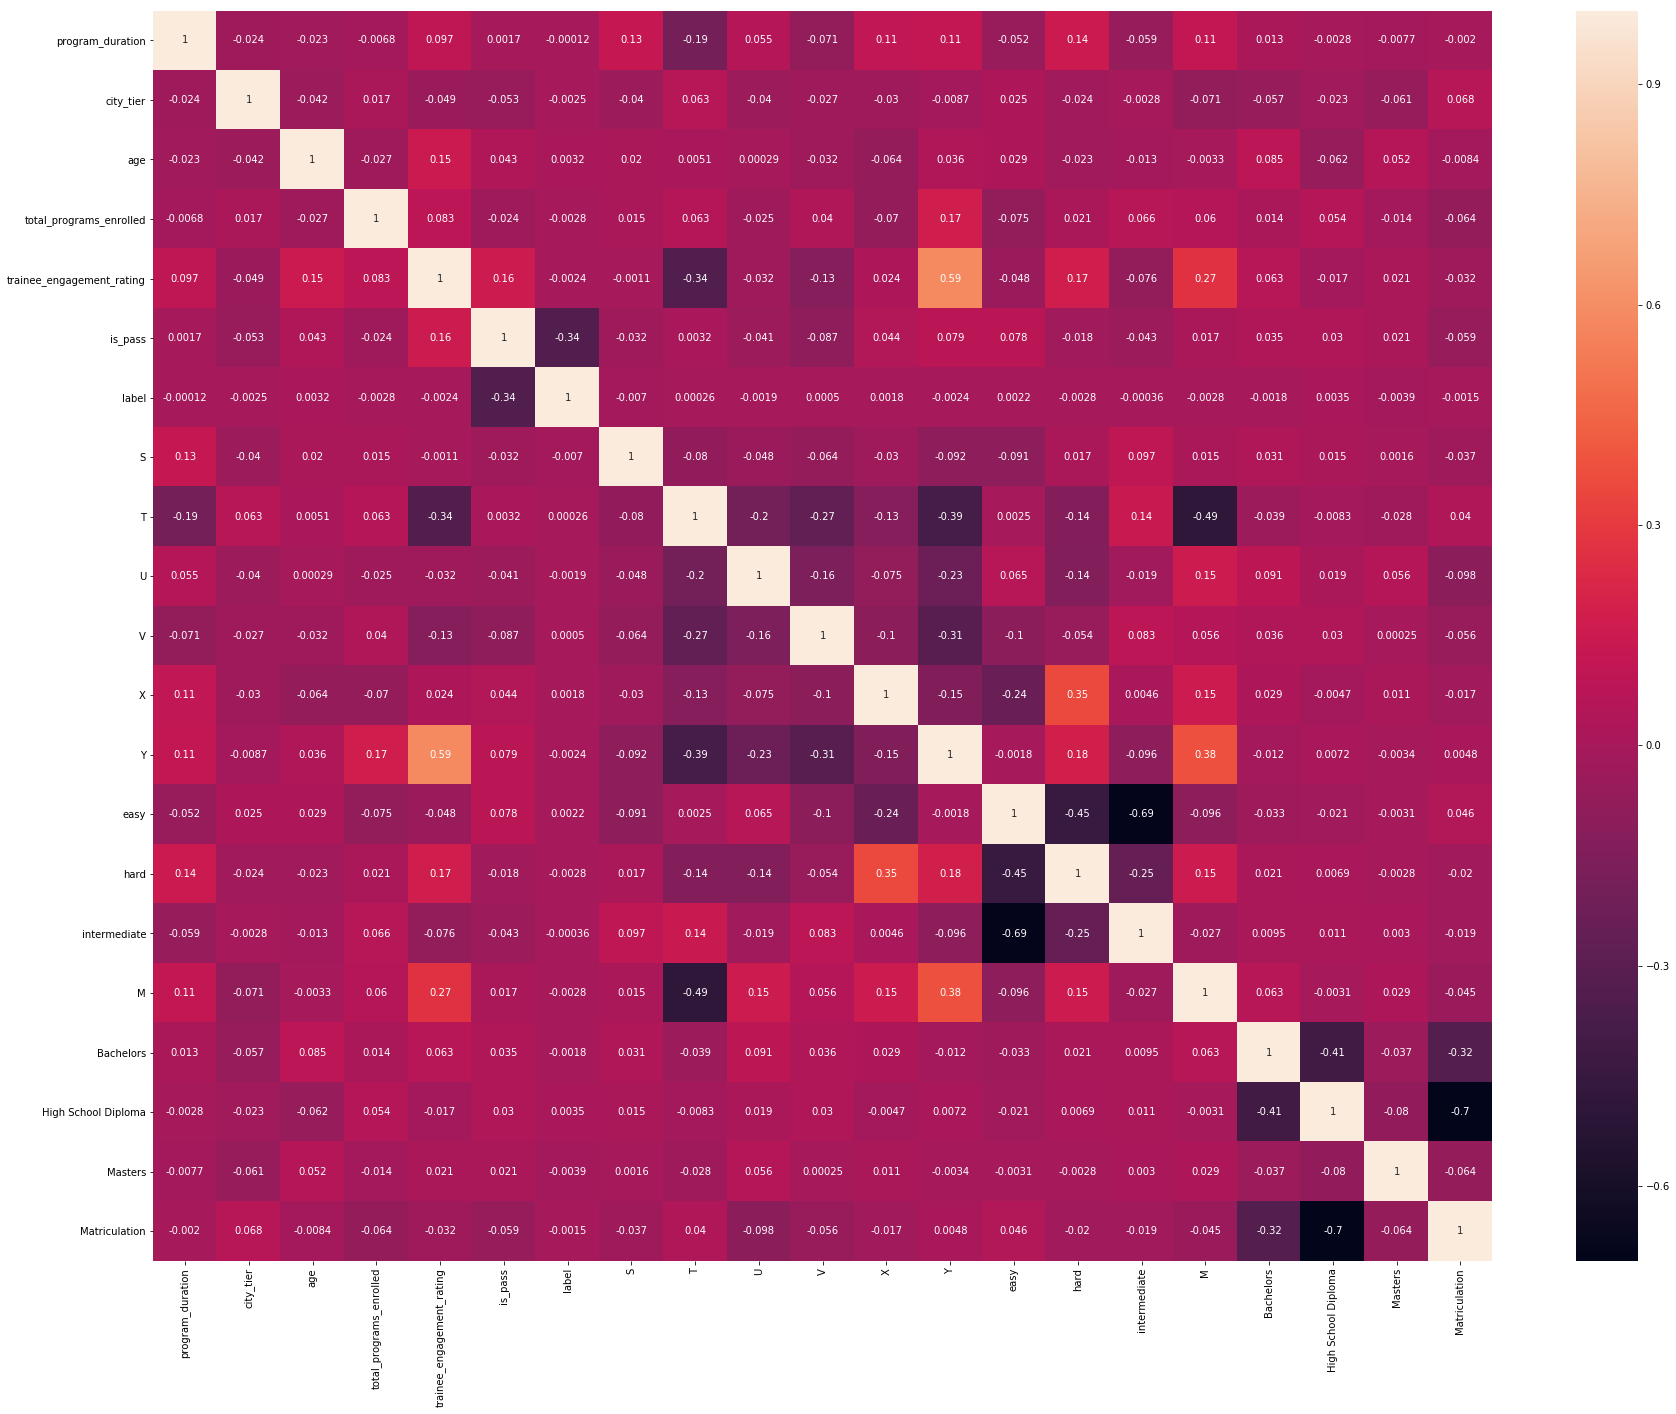

In [242]:
plt.figure(figsize=(30,23))
sns.heatmap(train.corr(),annot=True)
plt.plot()

In [256]:
test1.reset_index(inplace=True)

In [257]:
test1.shape

(31349, 20)

In [258]:
t=test1.pop('index')

In [259]:
test1.head()

,program_duration,city_tier,age,total_programs_enrolled,trainee_engagement_rating,S,T,U,V,X,Y,easy,hard,intermediate,M,Bachelors,High School Diploma,Masters,Matriculation
0,4.875197,3,3.828641,2,4.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,4.905275,3,3.737670,4,4.0,0,0,0,0,0,1,1,0,0,1,1,0,0,0
2,4.787492,3,3.737670,2,3.0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
3,4.804021,1,3.737670,2,2.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,4.804021,3,3.737670,2,2.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [260]:
data1.head(3)

,program_duration,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass,S,T,U,V,X,Y,easy,hard,intermediate,M,Bachelors,High School Diploma,Masters,Matriculation
0,4.912655,3,3.178054,5,1.0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1
1,4.875197,4,3.258097,2,3.0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,4.787492,1,3.688879,1,2.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [261]:
x = data1.iloc[:,:-1]

In [262]:
y=data1.iloc[:,-1:]

In [263]:
import warnings
warnings.filterwarnings("ignore")

LR: 0.996781 (0.000595)
LDA: 0.996862 (0.000626)
KNN: 0.996985 (0.000681)
CART: 0.996556 (0.000598)
NB: 0.993579 (0.001106)


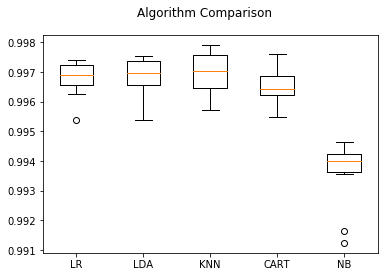

In [264]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
# scoring = 'accuracy'
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [265]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [271]:
from sklearn.metrics import roc_auc_score

In [130]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
res = lr.predict(x_test)
roc_auc_score(res, y_test)

0.9903532949135555

In [131]:
res=lr.predict(test1)

In [267]:
from xgboost import XGBClassifier

In [272]:
model = XGBClassifier()
model.fit(x_train, y_train)
res=model.predict(x_test)
roc_auc_score(res, y_test)

0.9903532949135555

In [132]:
values, counts = np.unique(res, return_counts=True)

In [133]:
values

array([0, 1], dtype=uint8)

In [134]:
counts

array([26117,  5232])

In [135]:
# submit= pd.read_csv("sample_submission.csv")

In [136]:
submit.head()

,id,is_pass
0,1626_45,0
1,11020_130,0
2,12652_146,0
3,7038_72,0
4,888_71,0


In [137]:
submit.drop(['id','is_pass'],axis=1,inplace=True)

In [138]:
submit.head()

""
0
1
2
3
4


In [139]:
submit["id"]=test.id

In [140]:
submit["is_pass"] = res

In [141]:
submit.shape

(31349, 2)

In [142]:
submit.to_csv("answer_2.csv", index=False)

In [143]:
##ye toh overfit ho gya ...lawwwl

# . . . . . . . . .